In [1]:
import resources.Get_Data as Get_Data
from resources.single_data.RF_AR import RF_AR
from resources.single_data.CART_AR import CART_AR
from resources.single_data.KNN_AR import KNN_AR
from resources.vectorised_data.MISO.ARX_repr.KNN_ARX import KNN_ARX
from resources.vectorised_data.MISO.ARX_repr.CART_ARX import CART_ARX
from resources.vectorised_data.MISO.ARX_repr.RF_ARX import RF_ARX
import matplotlib.pyplot as plt
import pandas as pd
import julia
from julia import Pkg
from julia import Main
import Get_Vectorised_Data
Pkg.add("DecisionTree")
Main.using("DecisionTree")

%load_ext julia.magic

[*********************100%***********************]  2 of 2 completed
make_diff()
                ^GSPC       ^IXIC
Date                             
2021-01-04 -55.420166 -189.830078
2021-01-05  26.210205  120.509766
2021-01-06  21.279785  -78.169922
2021-01-07  55.650146  326.690430
2021-01-08  20.889893  134.500000
...               ...         ...
2022-03-24  63.919922  269.240234
2022-03-25  22.899902  -22.540039
2022-03-28  32.459961  185.600586
2022-03-29  56.080078  264.739258
2022-03-30 -29.149902 -177.365234

[313 rows x 2 columns]
Initializing Julia interpreter. This may take some time...


In [2]:
getter = Get_Data.Get_Data("^IXIC", start="1980-02-15", end="1990-02-15", interval="1d")
ixic_vec_norm = getter.make_diff()

make_diff()


[ Info: Julia version info
[ Info: Julia executable: C:\Users\micuk\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: c:\users\micuk\pycharmprojects\vecm\scripts\python.exe
│     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll
│ Python:
│     python: c:\users\micuk\pycharmprojects\finalna_praca_licencjacka\scripts\python.exe
└     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll


Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
      Microsoft Windows [Version 10.0.19044.1586]
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  4200 MHz   11366078            0      4992234    102913281      1233093  ticks
       #2  4200 MHz    9778156            0      2010859    107482578        57109  ticks
       #3  4200 MHz   14275218            0      3140640    101855734        74875  ticks
       #4  4200 MHz   12086437            0      1793859    105391296        40046  ticks
       #5  4200 MHz   15070906            0      2548234    101652312        62343  ticks
       #6  4200 MHz   16888296            0      2429203     99953953        47234  ticks
       #7  4200 MHz   16804453            0      2589625     99877375        56671  ticks
       #8  4200 MHz   16120281            0      2020250    101130921     

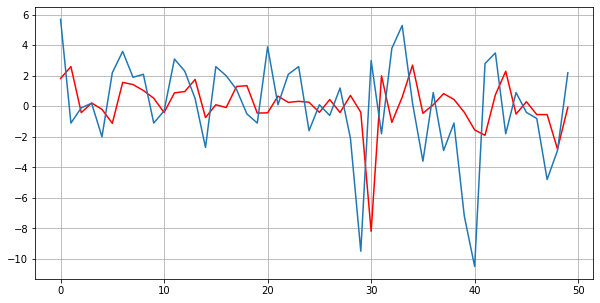

In [15]:
cart_ar = CART_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt = cart_ar.cross_validation_rolling_window_julia(dlugosc_okna=1/4, params = {
    "max_depth": 20,
    "min_samples_split": 5,
    "min_samples_leaf": 5
})

cart_ar.fit(params_fit={"max_depth":opt["depth"],
                       "min_samples_split":int(opt["min_samples_split"]),
                       "min_samples_leaf":int(opt["min_samples_leaf"])})

plt.figure(figsize=(10,5))
plt.plot(cart_ar.forecast_raw()[:50], c='r')
plt.plot(cart_ar.data_test[:50].values)

plt.grid()

print("SUMA: ",sum(cart_ar.data_test.values * cart_ar.forecast_raw() > 0), " / ", len(cart_ar.forecast_raw()))

In [ ]:
getter.analiza_statystyczna_szeregu(pd.DataFrame(cart_ar.errors))

In [ ]:
import numpy as np
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(cart_ar.forecast_raw()[:50]), c='r')
plt.plot(np.cumsum(cart_ar.data_test[:50].values))
plt.grid()
